Ejemplo de una red neuronal
https://bookdown.org/eljorgehdz/red_neuronal_mediante_python/Red-neuronal-mediante-Python.html

In [2]:
# Cargamos las paqueterías
import pandas_datareader as pdr
from datetime import datetime
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargamos los datos
Petroleo = pdr.DataReader("CL=F", "yahoo", start='2019-05-10', end='2021-05-10')
Oro = pdr.DataReader("GC=F", "yahoo", start='2019-05-10', end='2021-05-10')

# Visualizamos los datos a usar
print (Petroleo.Close, Oro.Close) 

Date
2019-05-10    61.660000
2019-05-13    61.040001
2019-05-14    61.779999
2019-05-15    62.020000
2019-05-16    62.869999
                ...    
2021-05-05    65.629997
2021-05-06    64.709999
2021-05-07    64.900002
2021-05-10    64.919998
2021-05-11    65.279999
Name: Close, Length: 505, dtype: float64 Date
2019-05-10    1285.699951
2019-05-13    1300.099976
2019-05-14    1294.699951
2019-05-15    1296.300049
2019-05-16    1285.000000
                 ...     
2021-05-05    1784.099976
2021-05-06    1815.500000
2021-05-07    1831.099976
2021-05-10    1837.500000
2021-05-11    1835.900024
Name: Close, Length: 505, dtype: float64


In [3]:
# creamos una capa densa para conectar los datos de entrada con los de salida
capa = tf.keras.layers.Dense(units = 1, input_shape=[1])

# Creamos un modelo sequencial para este caso
# Utilizamos una función de pérdida de error cuadrático medio
# Usamos el optimizador de Adamax para que el modelo mejore en lugar de empeorar conforme se entrena
modelo = tf.keras.Sequential([capa])
modelo.compile(
  optimizer=tf.keras.optimizers.Adamax(0.1),
  loss="mean_squared_error"
)

# Entrenamos el modelo. Le decimos a la función fit que lo haga 100 veces con epoch. 
# ¿Esto es mucho o poco? Lo averiguaremos cuando grafiquemos la función de pérdida.
historico = modelo.fit(Petroleo.Close, Oro.Close, epochs=100, verbose=False)

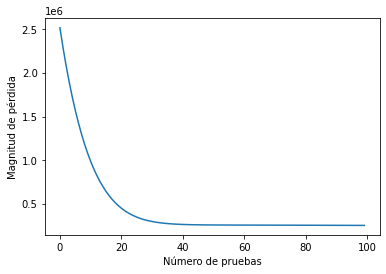

In [4]:
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"])
plt.show()

In [5]:
print("Si el precio del petroleo es de 50 dólares el barril, entonces el precio del oro tenderá a ser de", modelo.predict([50]), "dolares la onza")

1/1 [==============================] - 0s 152ms/step
Si el precio del petroleo es de 50 dólares el barril, entonces el precio del oro tenderá a ser de [[1598.9569]] dolares la onza
